--2019-07-29 18:39:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.02s   

2019-07-29 18:39:47 (1.68 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
Train set Accuracy:  0.5475
Test set Accuracy:  0.32


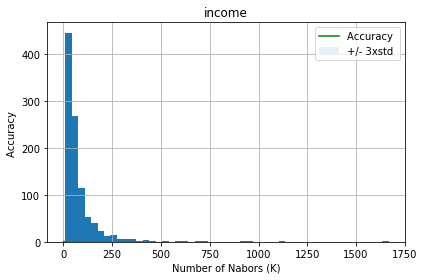

The best accuracy was with 0.34 with k= 9


In [1]:
# Lets load required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

# Load Data From CSV File
df = pd.read_csv('teleCust1000t.csv')
df.head()

# Let’s see how many of each class is in our data set
df['custcat'].value_counts()

# 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers
# You can easily explore your data using visualization techniques:
df.hist(column='income', bins=50)

# Lets define feature sets, X:
df.columns

# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

# What are our labels?
y = df['custcat'].values
y[0:5]

# Data Standardization give data zero mean and unit variance,
# it is good practice, especially for algorithms such as KNN which is based on distance of cases:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

# This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data.
# It is more realistic for real world problems.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Import library
# Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

# Training
# Lets start the algorithm with k=4 for now:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

# Predicting
# we can use the model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]

# Accuracy evaluation
# In multilabel classification, accuracy classification score is a function that computes subset accuracy.
# This function is equal to the jaccard_similarity_score function. 
# Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

# We can calculate the accuracy of KNN for different Ks.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 